<a href="https://colab.research.google.com/github/orlandxrf/curso-dl/blob/main/notebooks/10e_FineTuning_TextClassification_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine-Tuning para Clasificación de Textos en español
Basado en su mayoría de [Text Classification With BERT](https://github.com/susanli2016/NLP-with-Python/blob/master/Text_Classification_With_BERT.ipynb)

In [ ]:
# establecer parametros para almacenar y cargar el conjunto de datos del repositorio de Github
import os

URL = 'https://github.com/orlandxrf/curso-dl/blob/main/data/mx_news_dataset.zip?raw=True'
data_folder = 'data'
filepath = os.path.join(data_folder, 'mx_news_dataset.zip')

## Obtener el conjunto de datos

In [ ]:
# crear carpeta para almacenar el conjunto de datos
! mkdir {data_folder}
# descargar conjunto de datos y alamcenar
! wget -nc {URL} -O {filepath}

mkdir: cannot create directory ‘data’: File exists
File ‘data/mx_news_dataset.zip’ already there; not retrieving.


In [ ]:
# comprobrar
! ls -lh data/*

-rw-r--r-- 1 root root 420M Apr 20 16:37 data/finetuned_BERT_epoch_1.model
-rw-r--r-- 1 root root  42M Apr 20 14:35 data/mx_news_dataset.zip


In [ ]:
import pandas as pd

df = pd.read_csv('data/mx_news_dataset.zip', compression='zip', header=0, sep='\t', quotechar='"')

print (df.head(10))
print (f"\nLongitud de tweets: {len(df):,}")

  category  id_doc                                                doc
0   sports      41  miércoles julio tres cuatro franceses seguros ...
1   sports     136  miércoles julio presentan festival nacional in...
2   sports     137  miércoles julio torneo copa animalitos certero...
3   sports     164  miércoles julio atlético san luis igualó fc br...
4   sports     313  miércoles julio recuerdan juan martín terán to...
5   sports     314  miércoles julio artemarcialistas preparan torn...
6   sports     315  miércoles julio pone tono jaiba brava menos dí...
7   sports     358  miércoles julio albergará san buenaventura fun...
8   sports     390  miércoles julio boxeadores toluqueños alistan ...
9   sports     415  miércoles julio cuatro clasificados liguilla m...

Longitud de tweets: 75,000


1	5000	sports
2	5000	police
3	5000	spectacle
4	5000	politics
5	5000	security
6	5000	society
7	5000	culture
8	5000	economy
9	5000	justice
10	5000	show
11	5000	health
12	5000	technology
13	5000	finance
14	5000	gossip
15	5000	crime

75,000 noticias


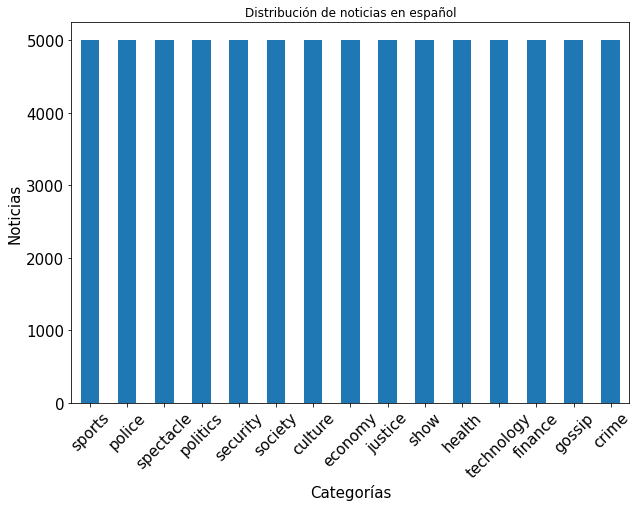

In [ ]:
import matplotlib.pyplot as plt

categories = dict(pd.value_counts(df['category']))
classes = list(categories.keys())
for i, sent in enumerate(categories):
  print (f"{i+1}\t{categories[sent]}\t{sent}")
print (f"\n{len(df):,} noticias")

# Graficar la distribución
plt.figure(figsize=(10, 7))
pd.value_counts(df['category']).plot.bar(title="Distribución de noticias en español")
plt.xlabel("Categorías", fontsize="15")
plt.ylabel("Noticias", fontsize="15")
plt.xticks(rotation=45, fontsize="15")
plt.yticks(fontsize="15")
plt.show()

   category  id_doc                                                doc
0         0      41  miércoles julio tres cuatro franceses seguros ...
1         0     136  miércoles julio presentan festival nacional in...
2         0     137  miércoles julio torneo copa animalitos certero...
3         0     164  miércoles julio atlético san luis igualó fc br...
4         0     313  miércoles julio recuerdan juan martín terán to...
5         0     314  miércoles julio artemarcialistas preparan torn...
6         0     315  miércoles julio pone tono jaiba brava menos dí...
7         0     358  miércoles julio albergará san buenaventura fun...
8         0     390  miércoles julio boxeadores toluqueños alistan ...
9         0     415  miércoles julio cuatro clasificados liguilla m...
1	5000	0
2	5000	1
3	5000	2
4	5000	3
5	5000	4
6	5000	5
7	5000	6
8	5000	7
9	5000	8
10	5000	9
11	5000	10
12	5000	11
13	5000	12
14	5000	13
15	5000	14

75,000 noticias


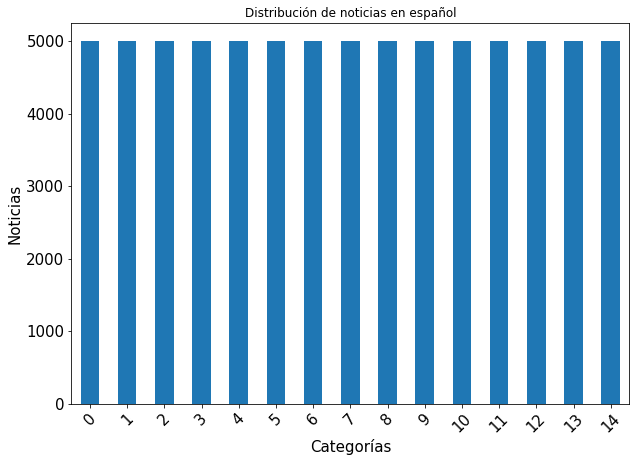

In [ ]:
label_dict= {cat : i for i, cat in enumerate(categories)}

df["category"] = df["category"].apply(lambda x: label_dict[x])

print (df.head(10))

categories = dict(pd.value_counts(df['category']))
classes = list(categories.keys())
for i, sent in enumerate(categories):
  print (f"{i+1}\t{categories[sent]}\t{sent}")
print (f"\n{len(df):,} noticias")

# Graficar la distribución
plt.figure(figsize=(10, 7))
pd.value_counts(df['category']).plot.bar(title="Distribución de noticias en español")
plt.xlabel("Categorías", fontsize="15")
plt.ylabel("Noticias", fontsize="15")
plt.xticks(rotation=45, fontsize="15")
plt.yticks(fontsize="15")
plt.show()

## Dividir el conjunto de datos

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.20, random_state=42, stratify=df['category'])

train.reset_index(drop=True, inplace=True) # eliminar la columna index
train.drop(['id_doc'], axis=1, inplace=True) # eliminar la columna id_doc

# print (train)
# print ('-'*100)

test.reset_index(drop=True, inplace=True) # eliminar la columna index
test.drop(['id_doc'], axis=1, inplace=True) # eliminar la columna id_doc

# print (test)
# print ('-'*100)

# print (train['category'].value_counts())
# print ('-'*100)

# print (test['category'].value_counts())

# dividir en conjunto de test en validación y test
valid, test = train_test_split(test, test_size=0.50, random_state=42, stratify=test['category'])

valid.reset_index(drop=True, inplace=True) # eliminar la columna index
test.reset_index(drop=True, inplace=True) # eliminar la columna index

# print (valid)

# print ('-'*100)

# print (test)

print ("TRAIN DATASET:\n")
print (train['category'].value_counts())

print ('-'*100)

print ("\nVALID DATASET:\n")
print (valid['category'].value_counts())

print ('-'*100)

print ("\nTEST DATASET:\n")
print (test['category'].value_counts())



TRAIN DATASET:

5     4000
6     4000
14    4000
8     4000
1     4000
12    4000
13    4000
3     4000
11    4000
10    4000
0     4000
9     4000
2     4000
4     4000
7     4000
Name: category, dtype: int64
----------------------------------------------------------------------------------------------------

VALID DATASET:

8     500
10    500
6     500
0     500
11    500
4     500
7     500
3     500
9     500
14    500
13    500
1     500
2     500
5     500
12    500
Name: category, dtype: int64
----------------------------------------------------------------------------------------------------

TEST DATASET:

1     500
3     500
7     500
14    500
2     500
13    500
6     500
12    500
9     500
0     500
10    500
4     500
11    500
8     500
5     500
Name: category, dtype: int64


In [ ]:
# clases
for lbl in label_dict:
    print (f"{label_dict[lbl]}\t{lbl}")

0	sports
1	police
2	spectacle
3	politics
4	security
5	society
6	culture
7	economy
8	justice
9	show
10	health
11	technology
12	finance
13	gossip
14	crime


## Tokenizar y codificar los datos con BERT

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 4.5 MB/s 
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 895 kB 38.0 MB/s 
     |████████████████████████████████| 6.6 MB 34.0 MB/s 
     |████████████████████████████████| 596 kB 36.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoTokenizer
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification
from transformers import AutoModelForSequenceClassification
import torch

In [ ]:
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda:0")

    print(f'Hay {torch.cuda.device_count()} GPU(s) disponibles para el entrenamiento')

    print(f'Se usará la GPU: {torch.cuda.get_device_name(0)}')
else:
    print('No hay GPU disponible, así que se usará CPU')
    device = torch.device("cpu")

Hay 1 GPU(s) disponibles para el entrenamiento
Se usará la GPU: Tesla K80


In [ ]:
# Modelo pre-entrenado usado: https://huggingface.co/finiteautomata/beto-sentiment-analysis

checkpoint = "finiteautomata/beto-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(checkpoint, model_max_length=512, do_lower_case=True)

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/236k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/469k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
train_docs = train['doc'].tolist()

In [ ]:
# codificar el train set
encoded_data_train = tokenizer.batch_encode_plus(
    train_docs, 
    add_special_tokens = True, 
    return_attention_mask = True, 
    pad_to_max_length = True, 
    max_length = 256, 
    return_tensors = 'pt'
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
valid_docs = valid['doc'].tolist()

In [ ]:
# codificar el valid set
encoded_data_valid = tokenizer.batch_encode_plus(
    valid_docs, 
    add_special_tokens = True, 
    return_attention_mask = True, 
    pad_to_max_length = True, 
    max_length = 256, 
    return_tensors = 'pt'
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
test_docs = test['doc'].tolist()

In [ ]:
# codificar el test set
encoded_data_test = tokenizer.batch_encode_plus(
    test_docs, 
    add_special_tokens = True, 
    return_attention_mask = True, 
    pad_to_max_length = True, 
    max_length = 256, 
    return_tensors = 'pt'
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
encoded_data_test

{'input_ids': tensor([[    4, 10516,  2766,  ...,  3506,  4073,     5],
        [    4,  3761,  1016,  ...,  3178, 20688,     5],
        [    4, 19364, 30934,  ..., 30943,  1045,     5],
        ...,
        [    4, 20727, 12507,  ...,  4378,  8798,     5],
        [    4,  1016,  2311,  ...,     1,     1,     1],
        [    4,  1345, 21710,  ...,     1,     1,     1]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
encoded_data_test['attention_mask'][0]
encoded_data_test['input_ids'][0]

tensor([    4, 10516,  2766,  3828, 16547,  1093,  4073, 18036,  2131, 19051,
        29835,  6588, 30937, 23409,  2789,  1180,  1729,  3767, 14824, 15257,
        30933,  6687, 15696,  2131, 19051, 12759,  4053,  2148,  4317,  8499,
         1186,  1863,  6588, 30937, 23409,  2789,  1180,  1221,  1729,  8247,
         1688,  2109,  2694, 11573,  4039,  2105,  1588,  1026,  6588, 30937,
        23409,  2789,  1180, 10100,  1018, 29835, 21174,  1213,  3060, 10996,
        11551, 11148,  2131,  3389, 21015,  8215,  2000, 15807,  7123,  3425,
         6118,  1806,  1588, 16773, 29835,  1891,  1102,  2243, 30953, 12759,
         1802, 15165,  3308,  6183,  1729, 26311,  1928,  2634,  2333,  2999,
         3134,  3767, 17827,  1565,  6652,  7132,  2027,  6612, 18036,  5579,
        13894,  1637,  2965,  2529,  7859,  2785,  8625,  1022,  2731, 23269,
         9022,  1729, 10821,  1675,  2934,  4712,  1110, 10651,  4853,  2116,
        30346,  1344,  1518, 24265,  7344,  6715,  1022,  4474, 

In [ ]:
from torch.utils.data import TensorDataset


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train['category'])

input_ids_valid = encoded_data_valid['input_ids']
attention_masks_valid = encoded_data_valid['attention_mask']
labels_valid = torch.tensor(valid['category'])

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test['category'])

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_valid = TensorDataset(input_ids_valid, attention_masks_valid, labels_valid)
dataset_test = TensorDataset(input_ids_valid, attention_masks_valid, labels_valid)

In [ ]:
# borrar dataframe
del df
del train
del test
del valid

## Modelo pre-entrenado 

In [ ]:
checkpoint = "finiteautomata/beto-sentiment-analysis"

model = AutoModelForSequenceClassification.from_pretrained(
        checkpoint,
        num_labels = len(label_dict),
        output_attentions = False,
        output_hidden_states = False,
        ignore_mismatched_sizes = True # es importante colocar este parámetro
)

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at finiteautomata/beto-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([15, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([15]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31006, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

## DataLoaders

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3 # cuando tenemos poca memoria reducir el tamaño del batch

dataloader_train = DataLoader(
    dataset_train, 
    sampler = RandomSampler(dataset_train), 
    batch_size = batch_size
)

dataloader_validation = DataLoader(
    dataset_valid, 
    sampler = SequentialSampler(dataset_valid), 
    batch_size=batch_size
)

dataloader_test = DataLoader(
    dataset_test, 
    sampler = SequentialSampler(dataset_test), 
    batch_size=batch_size
)

## Definir el optimizador y warmup

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(), lr=1e-5, eps=1e-8)
                  
epochs = 1

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


# Definir las métricas

In [ ]:
from sklearn.metrics import f1_score, classification_report

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

## Entrenamiento

In [ ]:
from tqdm.notebook import tqdm
import numpy as np
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'data/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/20000 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.6651970828726349
Validation loss: 0.46808066443665886
F1 Score (Weighted): 0.8957429854881577


## Cargar y evaluar el modelo entrenado

In [ ]:
checkpoint = "finiteautomata/beto-sentiment-analysis"

model = AutoModelForSequenceClassification.from_pretrained(
        checkpoint,
        num_labels = len(label_dict),
        output_attentions = False,
        output_hidden_states = False,
        ignore_mismatched_sizes = True # es importante colocar este parámetro
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at finiteautomata/beto-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([15, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([15]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31006, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# cargar modelo pre-entrenado
model.load_state_dict(torch.load('data/finetuned_BERT_epoch_1.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
_, predictions, true_vals = evaluate(dataloader_test)

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: sports
Accuracy: 477/500

Class: police
Accuracy: 465/500

Class: spectacle
Accuracy: 448/500

Class: politics
Accuracy: 395/500

Class: security
Accuracy: 447/500

Class: society
Accuracy: 351/500

Class: culture
Accuracy: 440/500

Class: economy
Accuracy: 456/500

Class: justice
Accuracy: 415/500

Class: show
Accuracy: 491/500

Class: health
Accuracy: 465/500

Class: technology
Accuracy: 448/500

Class: finance
Accuracy: 460/500

Class: gossip
Accuracy: 480/500

Class: crime
Accuracy: 477/500

